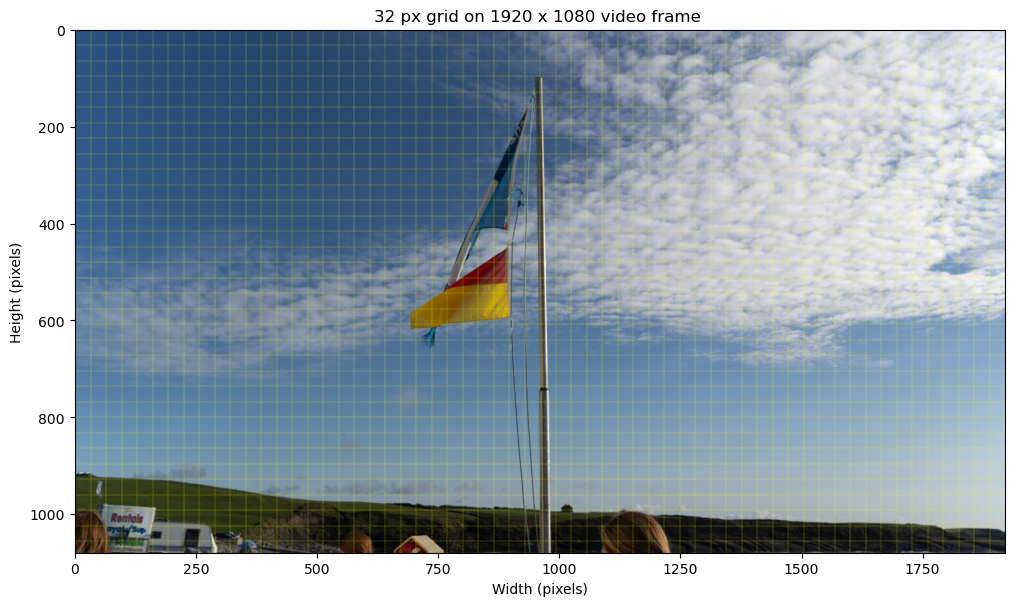

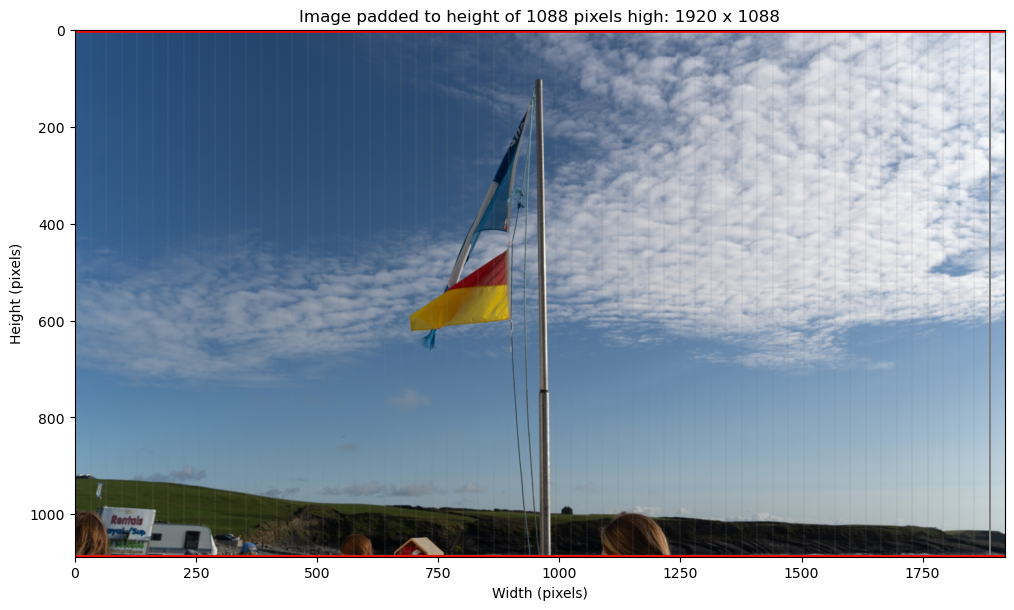

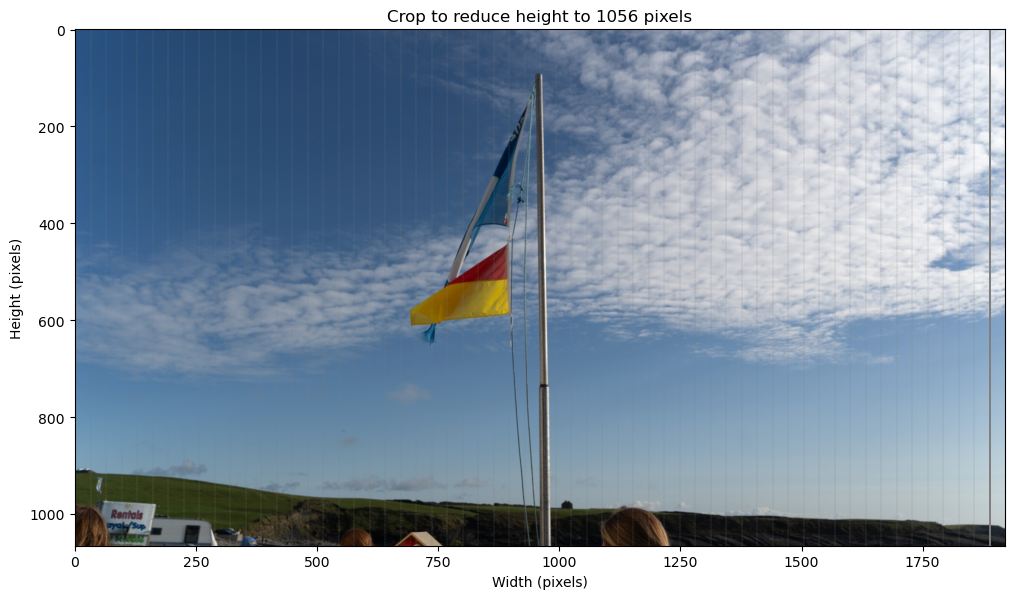

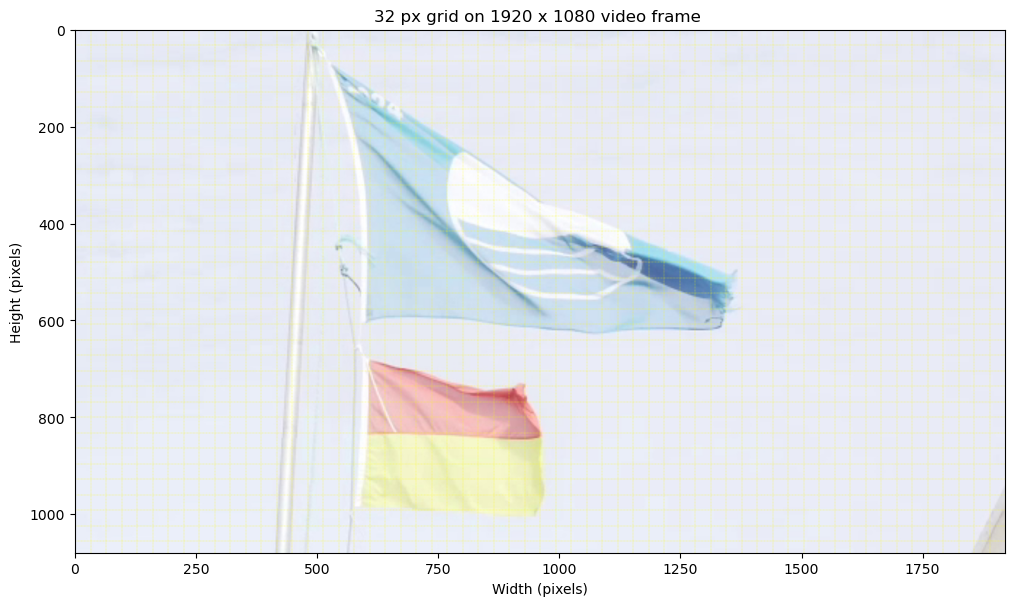

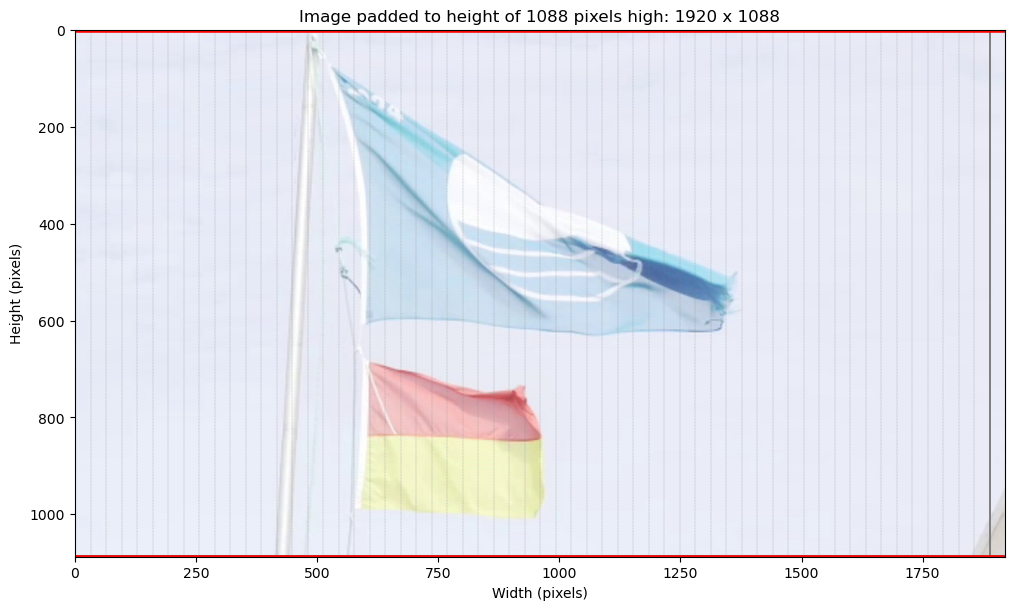

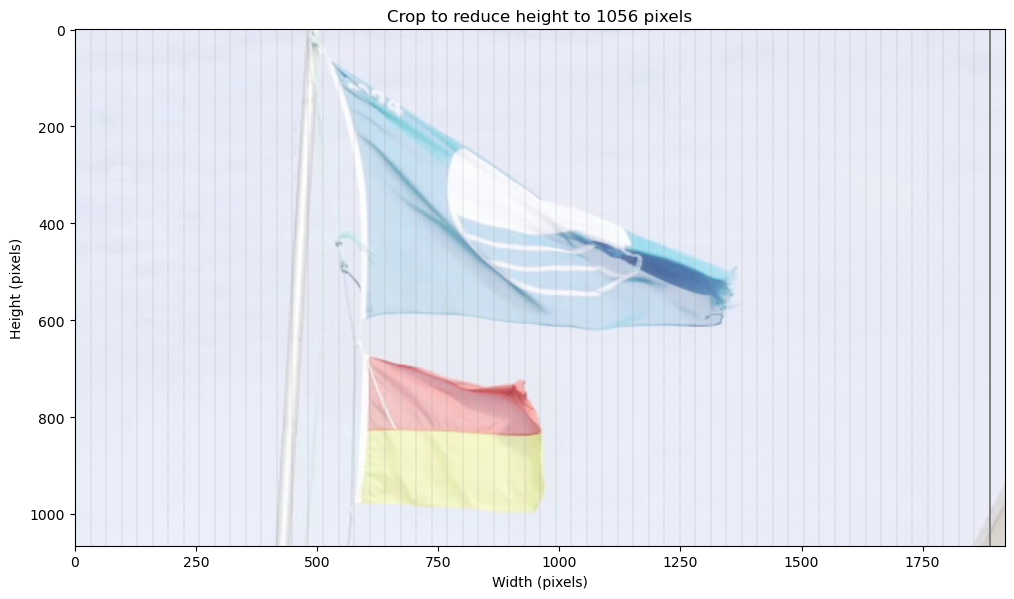

In [8]:
# Visualises effect of padding or cropping a video frame to 1088 and 1056 respectively 
# To plan resizing approach for Yolo 
#Replace all grey with yellow for top set and re-run 

import matplotlib.pyplot as plt
import numpy as np
import cv2


def draw_grid_on_image(image_path):
    """
    Draws a grid with 32-pixel blocks over the input image.

    Args:
        image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    # Image dimensions
    height, width, _ = image.shape
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.title(f"32 px grid on 1920 x 1080 video frame ")
    # Draw grid lines
    for x in range(0, width, 32):
        plt.axvline(x, color='yellow', linestyle='--', linewidth=0.2)
    for y in range(0, height, 32):
        plt.axhline(y, color='yellow', linestyle='--', linewidth=0.2)
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    # Show the grid
    plt.show()

# Grid 2  - pad extra 4 pixels to top and bottom so height isdivisible by 32 
def draw_padded_grid_on_image(image_path):
    """
    Pads the image uniformly with 8 pixels (4 pixels on top and bottom) and draws a grid with 32-pixel blocks over it.
    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Image dimensions
    height, width, _ = image.shape
    # Pad 4 pixels on top and bottom with red color
    padding_color = [255, 0, 0]  # Red color for visibility
    padded_image = cv2.copyMakeBorder(
        image_rgb, 
        top=4, bottom=4, left=0, right=0, 
        borderType=cv2.BORDER_CONSTANT, 
        value=padding_color
    )
    padded_height, padded_width, _ = padded_image.shape

    # Create a figure
    plt.figure(figsize=(12, 8))
    # Show the padded image
    plt.imshow(padded_image)
    plt.title(f"32 px grid on video frame 1920 x 1080: {padded_width} x {padded_height}")

    # Draw grid lines
    for x in range(0, padded_width, 32):
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)
        #plt.axvline(x, color='yellow', linestyle='--', linewidth=0.8)
    for y in range(0, padded_height, 32):
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)
        #plt.axhline(y, color='yellow', linestyle='--', linewidth=0.8)

    # Draw a rectangle around the padded area
    plt.gca().add_patch(
        plt.Rectangle((0, 4), width, height, edgecolor='cyan', linewidth=1.5, fill=False)
    )

    # Add x and y labels
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")

    # Show the grid
    plt.show()

# variant 3
import cv2
import matplotlib.pyplot as plt

def draw_padded_grid_on_imageV3(image_path):
    """
    Pads the image uniformly with 8 pixels (4 pixels on top and bottom) and draws a grid with 32-pixel blocks over it.

    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    # Pad 4 pixels on top and bottom with cyan color
    padding_color = [0, 255, 255]  # Cyan color for visibility
    padded_image = cv2.copyMakeBorder(
        image_rgb, 
        top=4, bottom=4, left=0, right=0, 
        borderType=cv2.BORDER_CONSTANT, 
        value=padding_color
    )

    padded_height, padded_width, _ = padded_image.shape

    # Create a figure
    plt.figure(figsize=(12, 8))

    # Show the padded image
    plt.imshow(padded_image)
    plt.title(f"Image padded to height of 1088 pixels high: {padded_width} x {padded_height}")

    # Draw grid lines within the original image region
    for x in range(0, width, 32):  # Grid lines along the width
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)         
        #plt.axvline(x, color='yellow', linestyle='--', linewidth=0.2)
    for y in range(4, height + 4, 32):  # Offset to account for padding
        #plt.axvline(x, color='yellow', linestyle='--', linewidth=0.2)
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)
    # Highlight the top and bottom padding (cyan-filled regions)
    plt.axhline(0, color='red', linewidth=4)  # Top of padding
    plt.axhline(padded_height - 1, color='red', linewidth=2)  # Bottom of padding

    # Add labels
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")

    # Show the result
    plt.show()


def draw_cropped_image_with_grid(image_path):
    """
    Crops 7 pixels from the top and bottom of the input image to reduce its height to 1056 pixels,
    then draws a 32-pixel grid over the cropped image.

    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Crop 7 pixels from the top and bottom
    cropped_image = image_rgb[7:-7, :, :]

    # Dimensions of the cropped image
    height, width, _ = cropped_image.shape

    # Create a figure
    plt.figure(figsize=(12, 8))

    # Show the cropped image
    plt.imshow(cropped_image)
    plt.title("Crop to reduce height to 1056 pixels")

    # Draw grid lines
    for x in range(0, width, 32):
        #plt.axvline(x, color='yellow', linestyle='--', linewidth=0.2)
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)
    for y in range(0, height, 32):
        #plt.axhline(y, color='yellow', linestyle='--', linewidth=0.2)
        plt.axvline(x, color='grey', linestyle='--', linewidth=0.2)

    # Add x and y labels
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")

    # Show the grid
    plt.show()


image_path = "D:/FlagDetectionDatasets\ExportedDatasetsSelected/Job_145/DSC08790.jpg" 
# image_path_scaled = "D:/FlagDetectionDatasets/ExportedDatasetsSelected/Job_145_Aug/DSC08780_scaled_3_0.jpg"
image_path_scaled ='D:/FlagDetectionDatasets/ExportedDatasetsSelected/Job_121_Aug/Job_121_000008_scaled_3_0.jpg'
draw_grid_on_image(image_path)
# view with 8 pixels added to height 
draw_padded_grid_on_imageV3(image_path)
draw_cropped_image_with_grid(image_path)

draw_grid_on_image(image_path_scaled)
# view with 8 pixels added to height 
draw_padded_grid_on_imageV3(image_path_scaled)
draw_cropped_image_with_grid(image_path_scaled)